- NOTE!: HERE We ASSUME that the datasets contains already S21, NOT the output power. We keep track of input power in the dataset name.

Libraries and functions found on web to display content of a .h5 file

In [ ]:
import h5py
import numpy as np

In [ ]:
"""DISPLAY CONTENT FUNCTIONS"""
from functools import reduce
from operator import concat

def descend_obj(obj,sep='\t',index=0):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """

    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        datasets_list = []
        print(sep,'[',index,'] -',obj)
        index = 0
        for key in obj.keys():
            if len(datasets_list) == 0:
                datasets_list = descend_obj(obj[key],sep+'\t',index)
            else:
                datasets_list = datasets_list + [descend_obj(obj[key],sep+'\t',index)]
            index = index + 1
    else:
        print(sep,'[',index,']-',obj.name,':',obj.shape)
        datasets_list = [obj.name]
    return datasets_list

    #return out_datasets_list
def h5dump(path,group='/'):
    """
    print HDF5 file metadata

    group: you can give a specific group, defaults to the root group
    """
    with h5py.File(path,'r') as f:
         dsets = descend_obj(f[group])
    return dsets

Here you can see the content of the file

In [ ]:
filename = "STOP_BAND_16_02_VALIDI.h5"   # CAMBIARE!!!

In [ ]:
"""GET _ALL_ GROUPS AND DATASETS"""
h5dump(filename,group = "/");

*PUT* the list of *only* the datasets in the SPECIFIED GROUP into an array, so each datasets has an INDEX "[ i ]"

In [169]:
"""GET LIST OF _ONLY DATASETS_ IN THE DESIRED GROUP AND _INDEXES_ THEM"""
group = "/"

hf = h5py.File(filename, 'r')
hfg = hf[group]
datasets_list = hf.keys()   # Note: this is a REFERENCE, so closing hf makes "datasets_list" useless!
datasets = []
for key in datasets_list:
    if type(hf[key]) == h5py._hl.dataset.Dataset:
        datasets = datasets + [key]
num_sets = len(datasets)
hf.close()

print("Datasets avaible:\n")
for i in np.arange(0,num_sets):
    print("[" + str(i) + "]" + " " + datasets[i] + "\n")

Datasets avaible:

[0] PUMP_PEAKS_14-20_-10dBm

[1] SIGNAL_PEAKS_1-11_20dBm



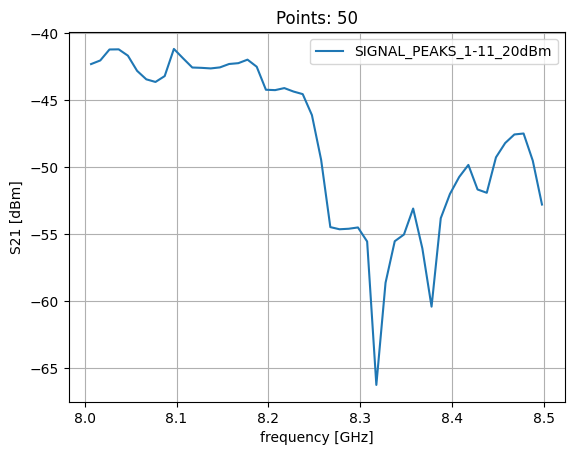

In [193]:
"""PLOT A SPECIFIC DATASET OF THE SELECTED GROUP"""
dataset_index = 1 # Index of the desired dataset
fmin = 8e9
fmax = 8.5e9


# Retrieve
hf = h5py.File(filename, 'r')
dataset_mat = hf.get(datasets[dataset_index])
freq = dataset_mat[0]
S21dBm = dataset_mat[1]
num = len(freq)
hf.close()  # Note: dataset_mat is just a reference, so hf file must be close AFTER assigning freq and S21dBm!
# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
i_min = max(round((fmin-freq[0])/((freq[num-1]-freq[0])/num)),0)
i_max = min(round((fmax-freq[0])/((freq[num-1]-freq[0])/num)),num-1)

ax.plot(freq[i_min:i_max]/1e9, S21dBm[i_min:i_max], label = str(datasets[dataset_index]))
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('S21 [dBm]')
ax.set_title("Points: " + str(i_max - i_min))
ax.grid(True)
ax.legend()

plt.show()



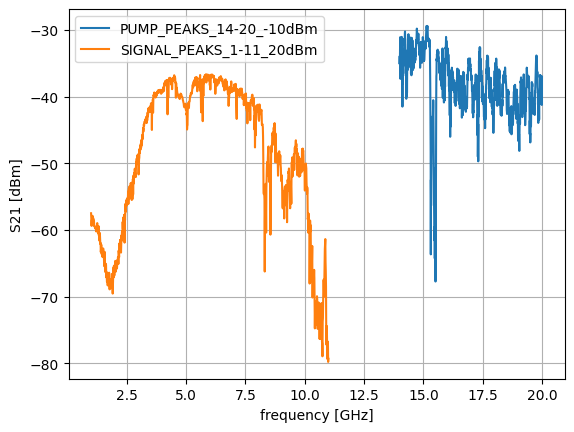

In [171]:
"""PLOT ALL DATASETS IN THE SELECTED GROUP"""
# Retrieve
hf = h5py.File(filename, 'r')

# Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in np.arange(0, num_sets):
    file_mat = hf.get(datasets[i])
    
    freq = file_mat[0]
    S21dB = file_mat[1]
    
    ax.plot(freq/1e9, S21dB, label = str(datasets[i]))
ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('S21 [dBm]')
ax.grid(True)
ax.legend()
#ax.legend(loc = "upper right")

plt.show()
hf.close()

In [ ]:
"""DELETE A DATASET"""
dataset_to_delete = ""  # Insert here the path: group/dataset
with h5py.File(filename,  "a") as f:
    del f[dataset_to_delete]